[View in Colaboratory](https://colab.research.google.com/github/mogamin/dlllab-hackathon/blob/master/dllab_1st_hackathon_tutorial_image_classification1_with_cuda_2.ipynb)

In [76]:
!ls -l

total 124
drwxr-xr-x 3 root root   4096 Aug  1 18:45 datalab
drwxr-xr-x 2 root root   4096 Aug  3 04:16 mnist
-rw-r--r-- 1 root root 116929 Aug  3 04:16 model_mnist.npz


In [0]:
import chainer
import chainer.links as L
import chainer.functions as F

In [0]:
class CNN(chainer.Chain):
  
  def __init__(self, n_mid=100, n_out=10):
    super().__init__()
    with self.init_scope():
      self.conv1 = L.Convolution2D(in_channels=1, out_channels=3, ksize=3, stride=1, pad=1)
      self.fc1 = L.Linear(None, n_mid)
      self.fc2 = L.Linear(None, n_out)
  
  def __call__(self, x):
    h = F.relu(self.conv1(x))
    h = F.max_pooling_2d(h, 3, 3)
    h = self.fc1(h)
    h = self.fc2(h)
    return h

In [0]:
# dllab-1st-hackathon-tutorial-image-classification1-with-cuda-1 で生成したモデルをロードする
model = L.Classifier(CNN())
chainer.serializers.load_npz('model_mnist.npz',model)

In [0]:
from chainer.datasets import get_mnist
train, test = get_mnist(ndim=3) 

(1, 28, 28)
5


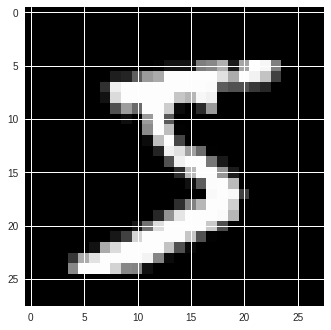

In [112]:
import matplotlib.pyplot as plt
x ,t = train[0]
print(x.shape)
plt.gray()
plt.imshow(x.reshape(28,28))
print(t)


In [113]:
import numpy as np
y = model.predictor(np.array([x],'f'))
print(y)

variable([[-0.9750328  -2.118344    1.1636071   5.189813   -3.5865119
            6.627645   -5.6441708   2.7316294  -1.8899047  -0.28336507]])


In [114]:
y_softmax = F.softmax(y)
print(y_softmax)

variable([[3.9490007e-04 1.2587907e-04 3.3518665e-03 1.8786494e-01
           2.8995870e-05 7.9120350e-01 3.7042998e-06 1.6079411e-02
           1.5818432e-04 7.8863237e-04]])


In [115]:
# softmaxすると総和は1となる
print(np.sum(y_softmax))

variable(1.0000001)


In [116]:
# type transform chainer > numpy
y_numpy_array = y.array
print(type(y_numpy_array))
np.argmax(y_numpy_array, axis=1)

<class 'numpy.ndarray'>


array([5])

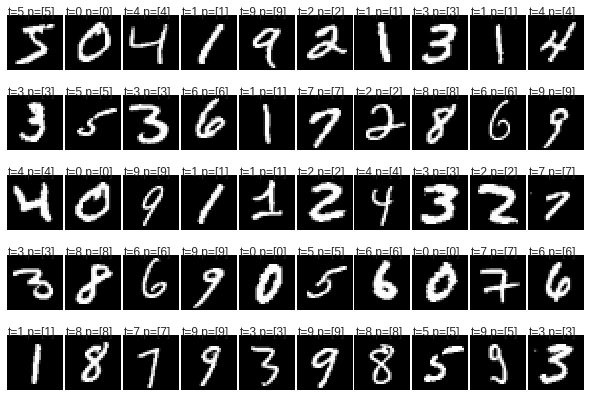

In [161]:
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(50):
    x ,t = train[i]
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x.reshape(28,28))
    
    # predict
    y = model.predictor(np.array([x],'f'))
    y = F.softmax(y)
    p = np.argmax(y.array, axis=1)
    
    ax.annotate('t='+str(t)+',p='+str(p), xy=(0, 0))
plt.show()


(3, 1, 3, 3)
variable W([[[[ 0.660964    0.22830191  0.43892464]
              [ 0.8393281   0.7049065  -0.2604262 ]
              [ 0.38153538 -0.02140122 -0.03442039]]]


            [[[ 0.19543864  0.13768171  0.5967659 ]
              [ 0.339504    0.13698143  0.26630974]
              [ 0.22032122  0.622418    0.09039367]]]


            [[[ 0.32213578 -0.13657586 -1.1218135 ]
              [ 0.4198423   0.40670893 -0.5395166 ]
              [ 0.9158305  -0.29736233 -0.00725759]]]])
<class 'chainer.variable.Parameter'>


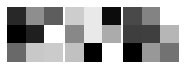

In [179]:
# 学習済みモデルで得られたフィルタの値を取得し、各画像に対して畳み込み（Convolution）を実行し、
# 数字をうまく分類できるようなフィルタはどのような画像になっているか確かめてみましょう。
W = model.predictor.conv1.W
print(W.shape)
print(W)
print(type(W))

W = model.predictor.conv1.W.array # transform chainer variable -> numpy array
n1, n2, h, w = W.shape
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(n1):
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(W[i, 0], cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()



![代替テキスト](http://cdn-ak.f.st-hatena.com/images/fotolife/a/aidiary/20150626/20150626203849.png)